# 선형 모형

## 1. 단순 선형 회귀

- 두 변수와의 관계 결정
- 예측하고자 하는 결과 변수(=반응변수)와, 예측에 사용되는 입력 변수(=예측 변수)로 나뉜다.

In [3]:
install.packages("UsingR")

also installing the dependencies 'checkmate', 'Formula', 'latticeExtra', 'acepack', 'htmlTable', 'HistData', 'Hmisc'



package 'checkmate' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'HistData' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked
package 'UsingR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpU7F2Ck\downloaded_packages


In [4]:
data(father.son, package="UsingR")

In [6]:
install.packages("ggplot2")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpU7F2Ck\downloaded_packages


In [10]:
library(ggplot2)

In [8]:
head(father.son)

fheight,sheight
65.04851,59.77827
63.25094,63.21404
64.95532,63.34242
65.75250,62.79238
61.13723,64.28113
63.02254,64.24221


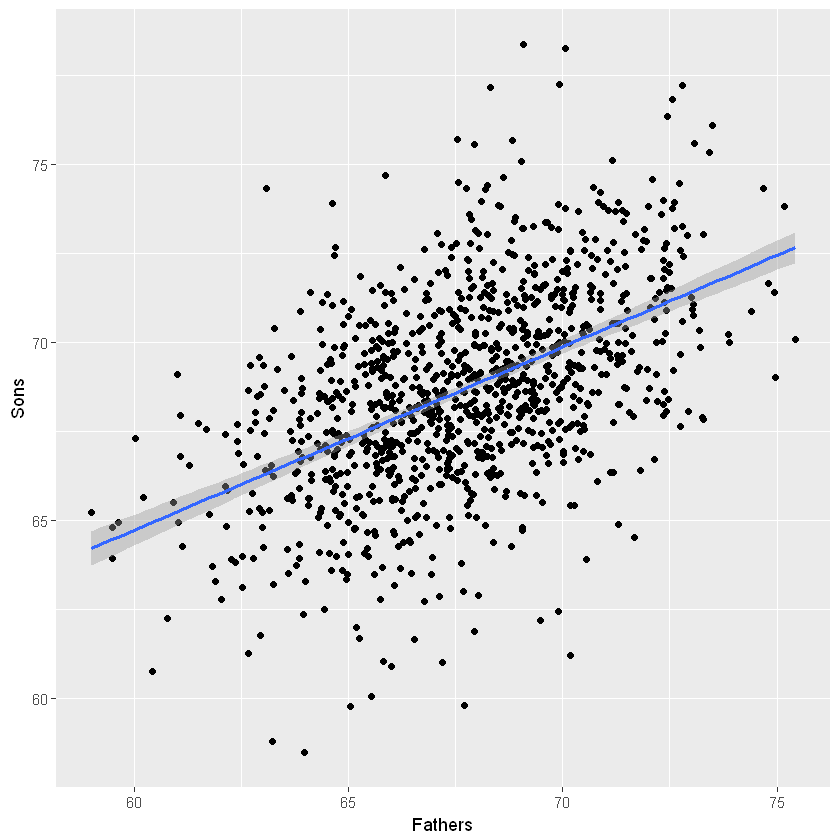

In [12]:
ggplot(father.son, aes(x=fheight, y=sheight))+
geom_point()+
geom_smooth(method='lm')+
labs(x='Fathers', y='Sons')

* 실제로 회귀를 계산할 때에는 lm 함수를 사용한다.

In [13]:
heightsLM <- lm(sheight ~ fheight, data=father.son)

In [14]:
heightsLM


Call:
lm(formula = sheight ~ fheight, data = father.son)

Coefficients:
(Intercept)      fheight  
    33.8866       0.5141  


In [15]:
summary(heightsLM)


Call:
lm(formula = sheight ~ fheight, data = father.son)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8772 -1.5144 -0.0079  1.6285  8.9685 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.88660    1.83235   18.49   <2e-16 ***
fheight      0.51409    0.02705   19.01   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.437 on 1076 degrees of freedom
Multiple R-squared:  0.2513,	Adjusted R-squared:  0.2506 
F-statistic: 361.2 on 1 and 1076 DF,  p-value: < 2.2e-16


### 1.1 분산분석 대신 회귀 사용

- 분산분석 대신 회귀를 사용할 수 있다.

In [16]:
install.packages("reshape2")

package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpU7F2Ck\downloaded_packages


In [17]:
data(tips, package = "reshape2")
head(tips)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4


* 모형에 절편을 포함시키지 않게 하기 위해 day - 1 로 지정한다.
* 카테고리형 변수 day의 각 레벨에 대해 각 계수를 구한다.

In [18]:
tipsAnova <- aov(tip ~ day -1, data=tips)

In [19]:
tipsLM <- lm(tip ~ day -1, data=tips)

In [21]:
summary(tipsAnova)

           Df Sum Sq Mean Sq F value Pr(>F)    
day         4 2203.0   550.8   290.1 <2e-16 ***
Residuals 240  455.7     1.9                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [20]:
summary(tipsLM)


Call:
lm(formula = tip ~ day - 1, data = tips)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2451 -0.9931 -0.2347  0.5382  7.0069 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
dayFri    2.7347     0.3161   8.651 7.46e-16 ***
daySat    2.9931     0.1477  20.261  < 2e-16 ***
daySun    3.2551     0.1581  20.594  < 2e-16 ***
dayThur   2.7715     0.1750  15.837  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.378 on 240 degrees of freedom
Multiple R-squared:  0.8286,	Adjusted R-squared:  0.8257 
F-statistic: 290.1 on 4 and 240 DF,  p-value: < 2.2e-16


## 2. 다중회귀

- 복수의 예측 변수로 확장

In [22]:
housing <- read.table("https://www.jaredlander.com/data/housing.csv",
                     sep = "," , header = TRUE,
                     stringsAsFactors = FALSE)

In [23]:
names(housing) <- c("Neighborhood", "Class", "Units", "YearBuilt",
                   "SqFt", "Income", "IncomePerSqFt", "Expense",
                   "ExpensePerSqFt", "NetIncome", "Value",
                   "ValuePerSqFt", "Boro")

- 데이터의 반응 변수 : 평방 피트 당 가격 (Value for square foot)

In [30]:
head(housing)

Neighborhood,Class,Units,YearBuilt,SqFt,Income,IncomePerSqFt,Expense,ExpensePerSqFt,NetIncome,Value,ValuePerSqFt,Boro
FINANCIAL,R9-CONDOMINIUM,42,1920,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
FINANCIAL,R4-CONDOMINIUM,78,1985,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
FINANCIAL,RR-CONDOMINIUM,500,NA,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
FINANCIAL,R4-CONDOMINIUM,282,1930,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
TRIBECA,R4-CONDOMINIUM,239,1985,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
TRIBECA,R4-CONDOMINIUM,133,1986,139719,5127687,36.70,1497788,10.72,3629899,26737996,191.37,Manhattan


- 반응 변수의 히스토그램 생성

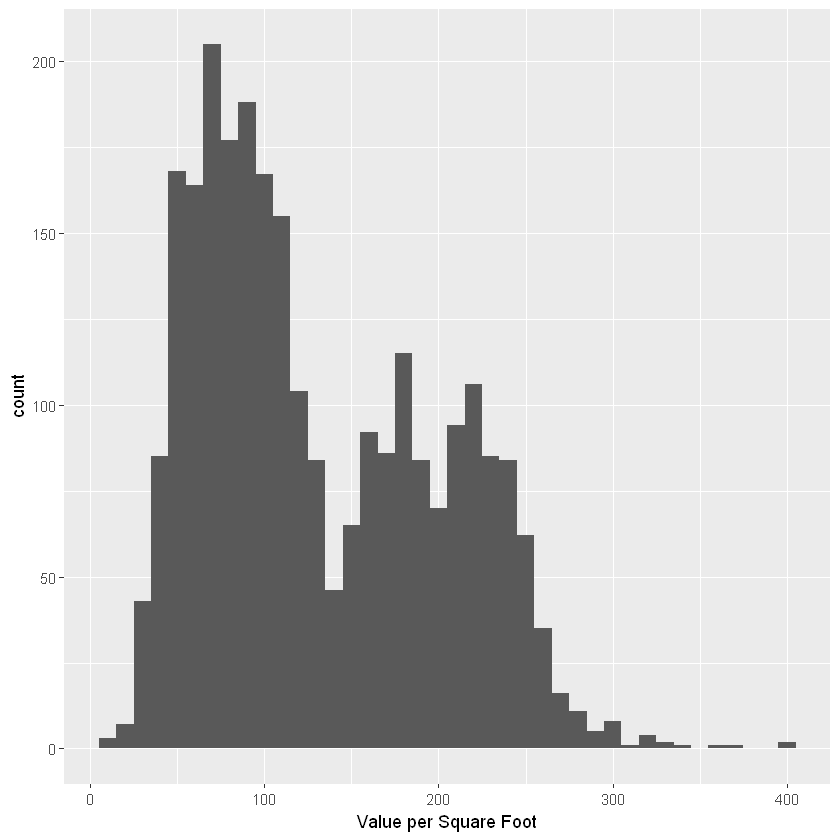

In [25]:
ggplot(housing, aes(x=ValuePerSqFt))+
geom_histogram(binwidth=10) + labs(x="Value per Square Foot")

- 지역구별로 플롯팅

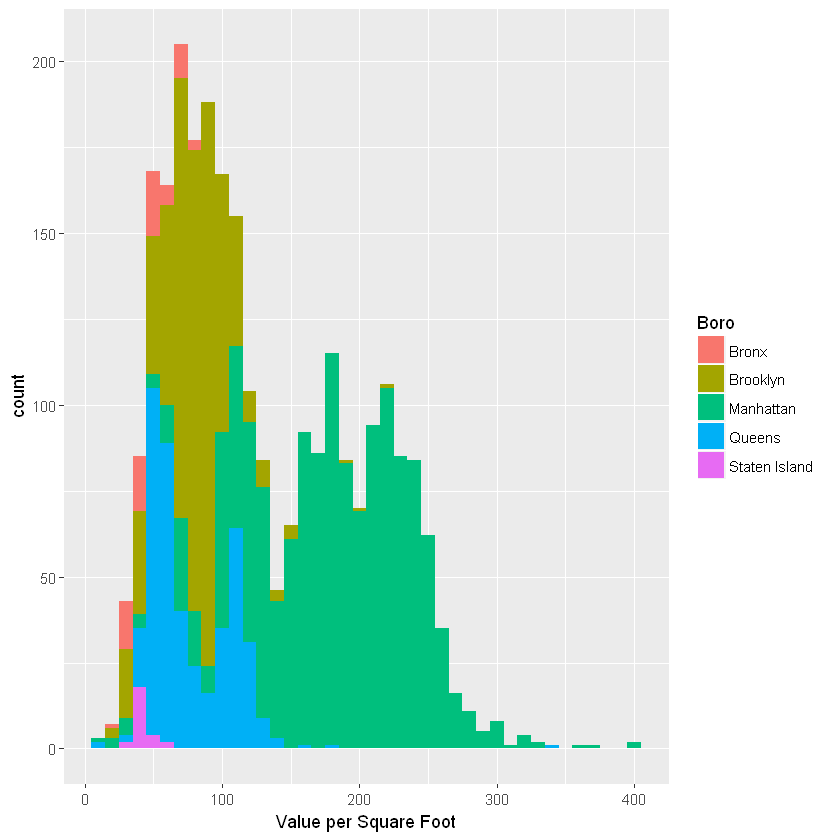

In [26]:
ggplot(housing, aes(x=ValuePerSqFt, fill=Boro))+
geom_histogram(binwidth=10) + labs(x="Value per Square Foot")

- 지역구별로 패시팅

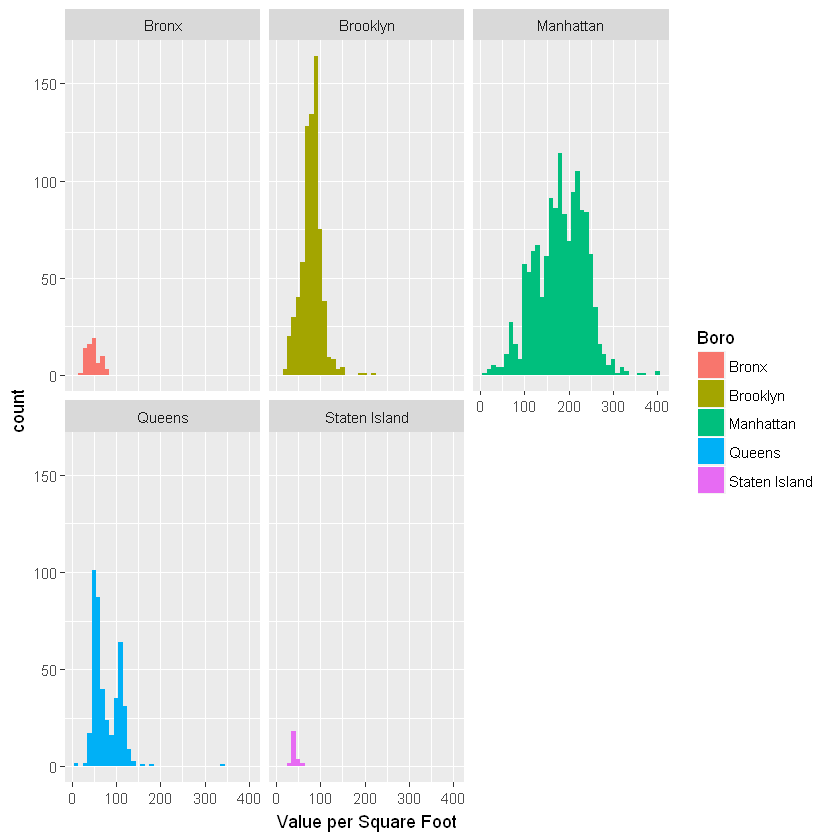

In [28]:
ggplot(housing, aes(x=ValuePerSqFt, fill=Boro))+
geom_histogram(binwidth=10) + labs(x="Value per Square Foot")+
facet_wrap(~Boro)

- 면적(평방피트)과 세대의 개수에 대해 히스토그램 생성
    - 위 2개의 그래프가 너무 심하게 오른쪽으로 치우쳐 있어서 1,000단위 이상 되는것들을 제외해 플롯팅

In [36]:
p11 <- ggplot(housing, aes(x=SqFt)) + geom_histogram()
p22 <- ggplot(housing, aes(x=Units)) + geom_histogram()
p33 <- ggplot(housing[housing$Units < 1000, ], aes(x=SqFt)) + geom_histogram()
p44 <- ggplot(housing[housing$Units < 1000, ], aes(x=Units)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


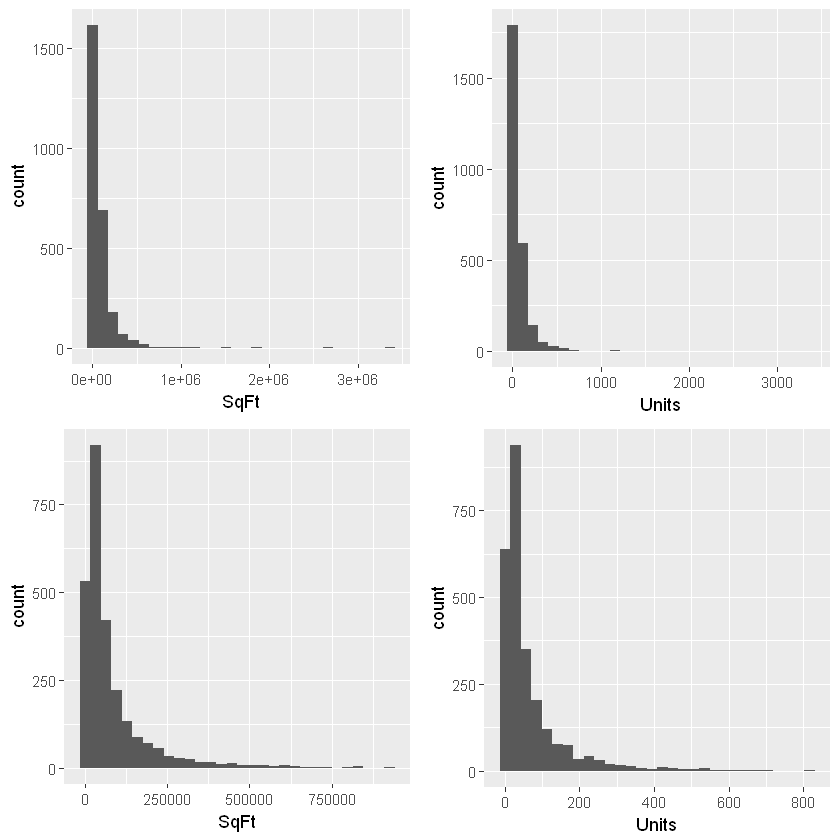

In [37]:
gridExtra::grid.arrange(p11, p22, p33, p44, nrow=2)

- 평방피트당 가격을 면적과 세대수에 따라 산점도 생성

In [38]:
pa <- ggplot(housing, aes(x=SqFt, y=ValuePerSqFt)) + geom_point()
pb <- ggplot(housing, aes(x=Units, y=ValuePerSqFt)) + geom_point()
pc <- ggplot(housing[housing$Units <1000,], aes(x=SqFt, y=ValuePerSqFt))+ geom_point()
pd <- ggplot(housing[housing$Units <1000,], aes(x=Units, y=ValuePerSqFt))+ geom_point()

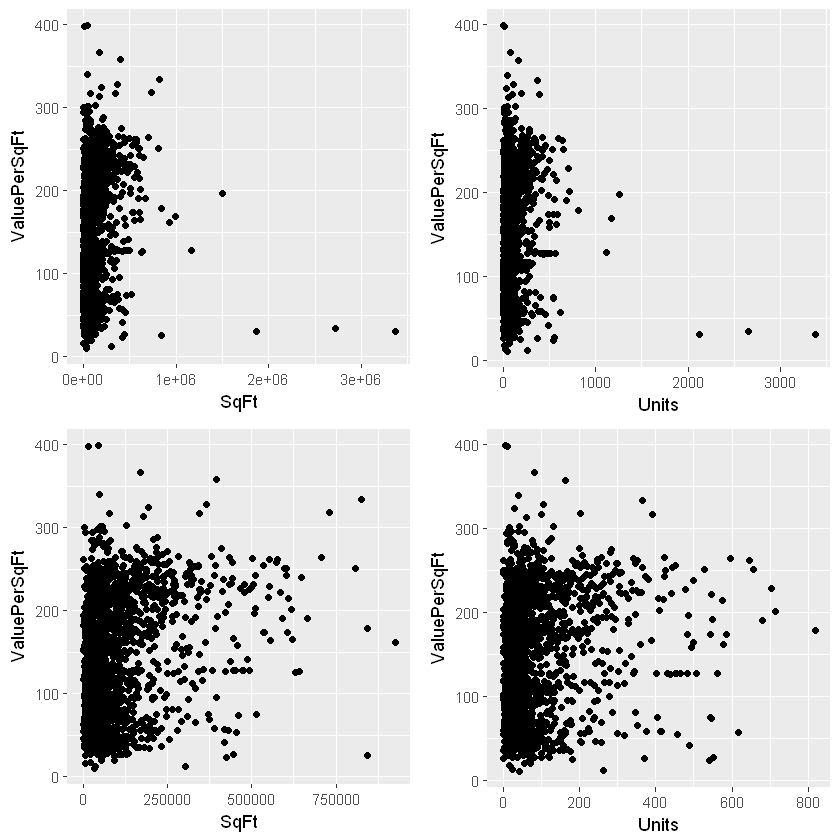

In [39]:
gridExtra::grid.arrange(pa,pb,pc,pd, nrow=2)

- 이상치를 몇 개나 제거할 것인가?

In [40]:
sum(housing$Units >= 1000)

[1] 6

In [41]:
housing <- housing[housing$Units < 1000,]

- 로그 변환 적용

In [47]:
pa <- ggplot(housing, aes(x=SqFt, y=ValuePerSqFt)) + geom_point()
pb <- ggplot(housing, aes(x=log(SqFt), y=ValuePerSqFt)) + geom_point()
pc <- ggplot(housing, aes(x=SqFt, y=log(ValuePerSqFt)))+ geom_point()
pd <- ggplot(housing, aes(x=log(SqFt), y=log(ValuePerSqFt)))+ geom_point()

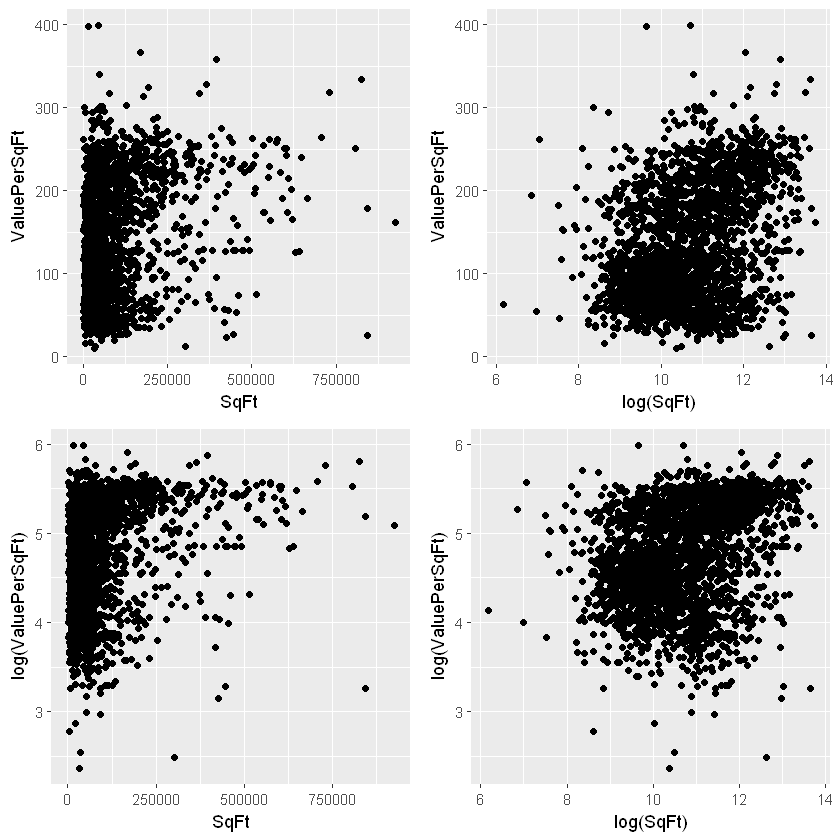

In [48]:
gridExtra::grid.arrange(pa,pb,pc,pd, nrow=2)

- Modeling

In [49]:
house1 <- lm(ValuePerSqFt ~ Units + SqFt + Boro , data=housing)

In [50]:
summary(house1)


Call:
lm(formula = ValuePerSqFt ~ Units + SqFt + Boro, data = housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-168.458  -22.680    1.493   26.290  261.761 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.430e+01  5.342e+00   8.293  < 2e-16 ***
Units             -1.532e-01  2.421e-02  -6.330 2.88e-10 ***
SqFt               2.070e-04  2.129e-05   9.723  < 2e-16 ***
BoroBrooklyn       3.258e+01  5.561e+00   5.858 5.28e-09 ***
BoroManhattan      1.274e+02  5.459e+00  23.343  < 2e-16 ***
BoroQueens         3.011e+01  5.711e+00   5.272 1.46e-07 ***
BoroStaten Island -7.114e+00  1.001e+01  -0.711    0.477    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 43.2 on 2613 degrees of freedom
Multiple R-squared:  0.6034,	Adjusted R-squared:  0.6025 
F-statistic: 662.6 on 6 and 2613 DF,  p-value: < 2.2e-16


In [51]:
coef(house1)

(Intercept)             Units              SqFt      BoroBrooklyn 
     4.430325e+01     -1.532405e-01      2.069727e-04      3.257554e+01 
    BoroManhattan        BoroQueens BoroStaten Island 
     1.274259e+02      3.011000e+01     -7.113688e+00

In [52]:
install.packages("coefplot")

also installing the dependency 'useful'



package 'useful' successfully unpacked and MD5 sums checked
package 'coefplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpU7F2Ck\downloaded_packages


In [53]:
library(coefplot)

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

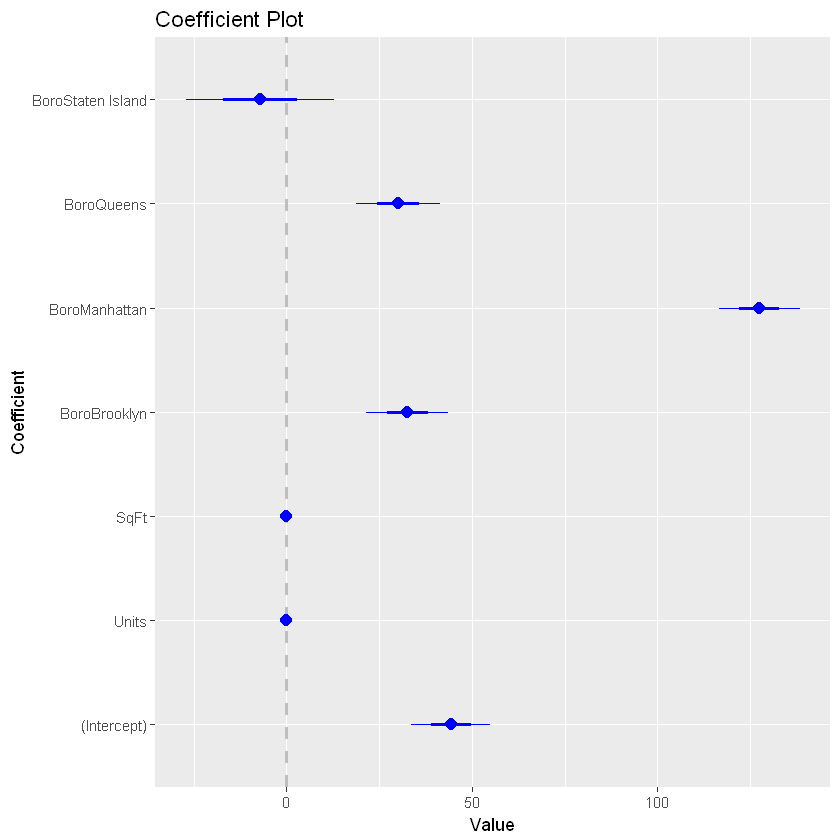

In [54]:
coefplot(house1)

- 상호작용 항을 고려
    - 상호작용과 개별 효과를 동시 적용 : '*'
    - 상호작용 만 적용 : ':'

In [55]:
house2 <- lm(ValuePerSqFt ~ Units * SqFt + Boro, data=housing)
house3 <- lm(ValuePerSqFt ~ Units : SqFt + Boro, data=housing)

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

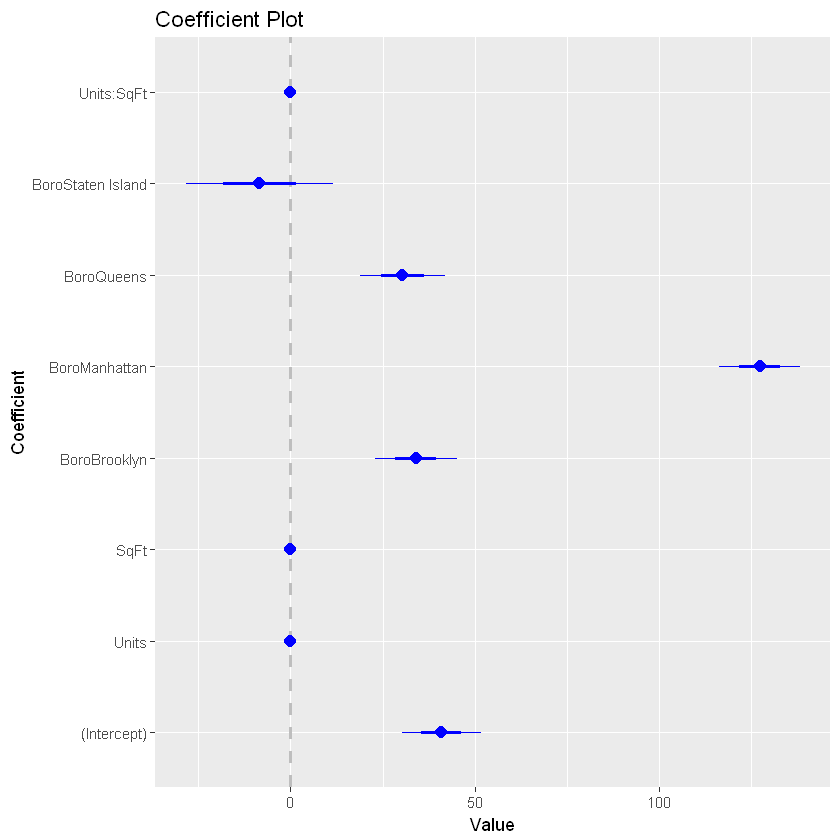

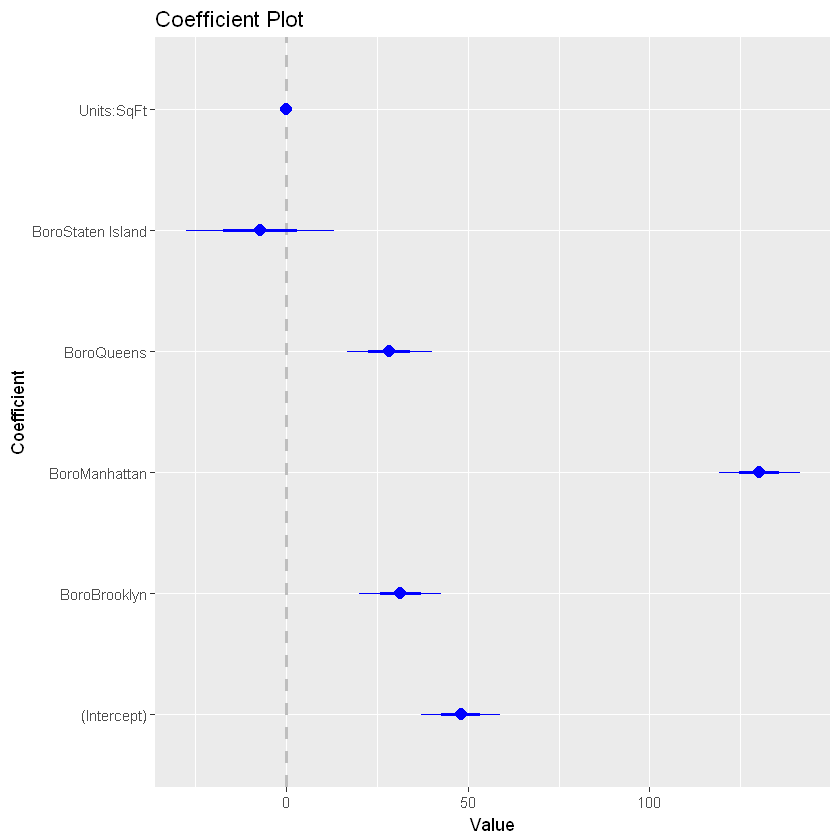

In [56]:
coefplot(house2)
coefplot(house3)

* 3개 변수의 상호작용을 모두 고려

In [57]:
house4 <- lm(ValuePerSqFt ~ SqFt*Units*Income, housing)

In [60]:
house4$coefficients

(Intercept)              SqFt             Units            Income 
     1.116433e+02     -1.694688e-03      7.142611e-03      7.250830e-05 
       SqFt:Units       SqFt:Income      Units:Income SqFt:Units:Income 
     3.158094e-06     -5.129522e-11     -1.279236e-07      9.107312e-14

* 어느 모형에서도 SqFt, Units은 통계적으로 유의해 보이지 않는다
    * But, Boro 변수는 0 or 1 , Units 변수는 1 ~ 818 , SqFt 변수는 478 ~ 925 값을 가진다
    * 이 변수들을 표준화 하는 방법으로 해결할 수 있다.

In [61]:
house1.b <- lm(ValuePerSqFt ~ scale(Units) + scale(SqFt) + Boro, data=housing)

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

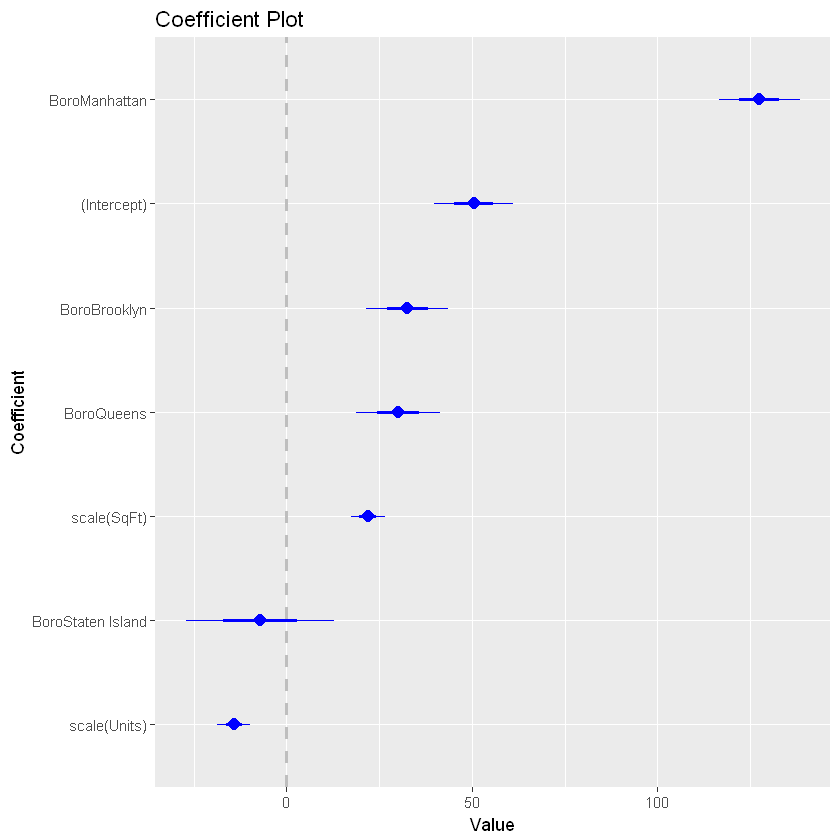

In [62]:
coefplot(house1.b, sort='mag')

- 여러 모형 중 최적의 것을 찾는다

Warning message:
"Ignoring unknown aesthetics: xmin, xmax"

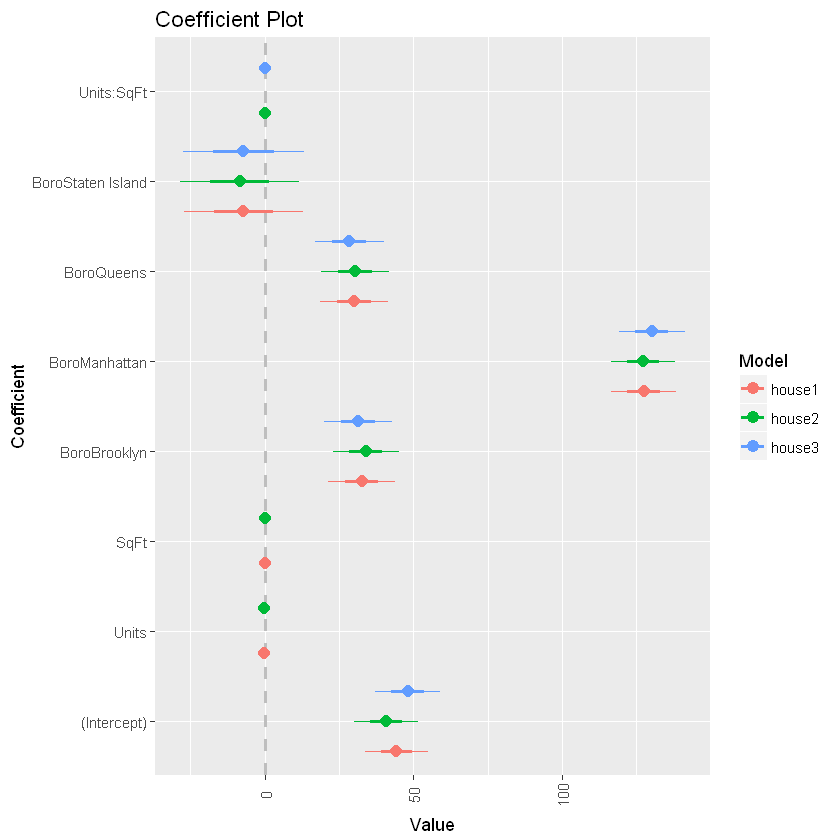

In [63]:
multiplot(house1, house2, house3)

- 새로운 데이터를 활용해서 예측(Prediction)을 수행한다

In [64]:
housingNew <- read.table("http://www.jaredlander.com/data/housingNew.csv",
                        sep=",", header=TRUE, stringsAsFactors=FALSE)

In [65]:
housingPredict <- predict(house1, newdata=housingNew, se.fit=TRUE,
                         interval="prediction", level=.95) # 95% 신뢰구간을 통한 새데이터 예측

- 표준 에러에 기반해 예측된 양 끝단의 값을 확인한다.

In [67]:
head(housingPredict$fit)

,fit,lwr,upr
1,74.00645,-10.813887,158.8268
2,82.04988,-2.728506,166.8283
3,166.65975,81.808078,251.5114
4,169.00970,84.222648,253.7968
5,80.00129,-4.777303,164.7799
6,47.87795,-37.480170,133.2361


- 예측에 대한 표준오차를 확인한다.

In [68]:
head(housingPredict$se.fit)

1        2        3        4        5        6 
2.118509 1.624063 2.423006 1.737799 1.626923 5.318813